In [2]:
import pandas as pd 
import numpy as np

In [3]:
medal_count = pd.read_excel("/Users/deepjeetdatta/Downloads/archive/Medals.xlsx")

/Users/deepjeetdatta/opt/anaconda3/lib/python3.8/site-packages/openpyxl/styles/stylesheet.py:221: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [4]:
medal_count

,Rank,Team/NOC,Gold,Silver,Bronze,Total,Rank by Total
0,1,United States of America,39,41,33,113,1
1,2,People's Republic of China,38,32,18,88,2
2,3,Japan,27,14,17,58,5
3,4,Great Britain,22,21,22,65,4
4,5,ROC,20,28,23,71,3
...,...,...,...,...,...,...,...
88,86,Ghana,0,0,1,1,77
89,86,Grenada,0,0,1,1,77
90,86,Kuwait,0,0,1,1,77
91,86,Republic of Moldova,0,0,1,1,77


In [5]:
medal_count["Total"].mean()

11.612903225806452

In [6]:
np.average(medal_count["Gold"], weights=medal_count["Total"])

14.743518518518519

In [7]:
np.average(medal_count["Total"], weights=medal_count["Gold"])

46.832352941176474

In [8]:
from scipy.stats import trim_mean

In [9]:
trim_mean(medal_count["Gold"], 0.1)

1.96

In [10]:
medal_count["Total"].median()

4.0

In [11]:
def weighted_median(df, val, weight):
    df_sorted = df.sort_values(val)
    cumsum = df_sorted[weight].cumsum()
    cutoff = df_sorted[weight].sum() / 2.
    return df_sorted[cumsum >= cutoff][val].iloc[0]

weighted_median(medal_count, "Total", "Gold")

40

In [12]:
q3 = np.percentile(medal_count["Total"], 75)

In [13]:
q3

11.0

In [14]:
from statistics import variance
variance(medal_count["Gold"])


49.315100514259

In [15]:
from statistics import stdev
stdev(medal_count["Gold"])

7.022471111671376

In [16]:
from numpy import mean, absolute
mean(absolute(medal_count["Gold"] - mean(medal_count["Gold"])))

4.0048560527228485

In [17]:
from numpy import median, absolute
median(absolute(medal_count["Gold"] - median(medal_count["Gold"])))

1.0

In [18]:
q3, q1 = np.percentile(medal_count["Gold"], [75, 25])
iqr = q3 -q1
iqr

3.0

<AxesSubplot:>

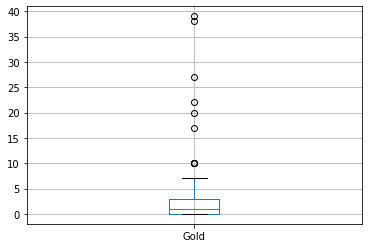

In [19]:
medal_count.boxplot(column="Gold", by=None, ax=None)

In [20]:
pd.cut(medal_count["Gold"], 10)

0      (35.1, 39.0]
1      (35.1, 39.0]
2      (23.4, 27.3]
3      (19.5, 23.4]
4      (19.5, 23.4]
          ...      
88    (-0.039, 3.9]
89    (-0.039, 3.9]
90    (-0.039, 3.9]
91    (-0.039, 3.9]
92    (-0.039, 3.9]
Name: Gold, Length: 93, dtype: category
Categories (10, interval[float64]): [(-0.039, 3.9] < (3.9, 7.8] < (7.8, 11.7] < (11.7, 15.6] ... (23.4, 27.3] < (27.3, 31.2] < (31.2, 35.1] < (35.1, 39.0]]

In [26]:
frequency_table = medal_count.copy()
frequency_table["freq"] = pd.cut(medal_count["Gold"], 10)
frequency_table

,Rank,Team/NOC,Gold,Silver,Bronze,Total,Rank by Total,freq
0,1,United States of America,39,41,33,113,1,"(35.1, 39.0]"
1,2,People's Republic of China,38,32,18,88,2,"(35.1, 39.0]"
2,3,Japan,27,14,17,58,5,"(23.4, 27.3]"
3,4,Great Britain,22,21,22,65,4,"(19.5, 23.4]"
4,5,ROC,20,28,23,71,3,"(19.5, 23.4]"
...,...,...,...,...,...,...,...,...
88,86,Ghana,0,0,1,1,77,"(-0.039, 3.9]"
89,86,Grenada,0,0,1,1,77,"(-0.039, 3.9]"
90,86,Kuwait,0,0,1,1,77,"(-0.039, 3.9]"
91,86,Republic of Moldova,0,0,1,1,77,"(-0.039, 3.9]"


In [22]:
frequency_table.groupby("freq")["Rank"].count()

freq
(-0.039, 3.9]    72
(3.9, 7.8]       11
(7.8, 11.7]       4
(11.7, 15.6]      0
(15.6, 19.5]      1
(19.5, 23.4]      2
(23.4, 27.3]      1
(27.3, 31.2]      0
(31.2, 35.1]      0
(35.1, 39.0]      2
Name: Rank, dtype: int64

In [27]:
import matplotlib.pyplot as plt

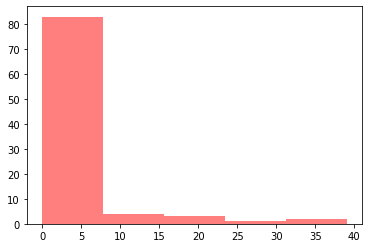

In [31]:
plt.hist(medal_count["Gold"], bins = 5, color='red', alpha=0.5)
plt.show()

<AxesSubplot:ylabel='Density'>

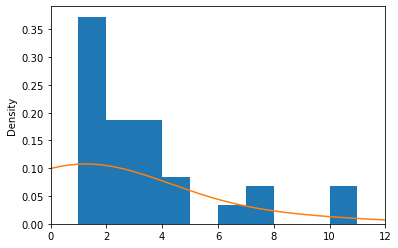

In [32]:
ax = medal_count["Gold"].plot.hist(density=True, xlim=[0,12], bins=range(1,12))
medal_count['Gold'].plot.density(ax=ax)


In [33]:
medal_count["Gold"].mode()

0    0
dtype: int64

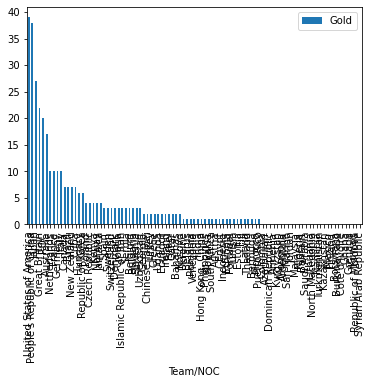

In [34]:
ax = medal_count.plot.bar(x="Team/NOC", y="Gold" )

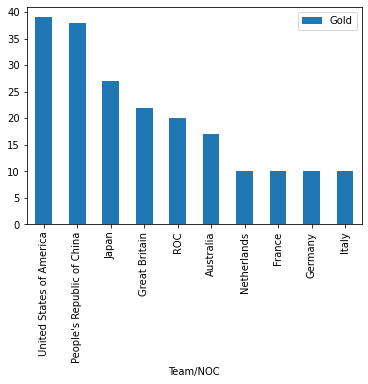

In [36]:
ax = medal_count.iloc[:10, :].plot.bar(x="Team/NOC", y="Gold" )

<AxesSubplot:ylabel='Gold'>

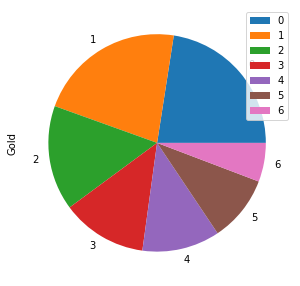

In [38]:
medal_count.iloc[:7, :].plot.pie(y='Gold', figsize=(5, 5))


In [39]:
medal_count.corr()

,Rank,Gold,Silver,Bronze,Total,Rank by Total
Rank,1.000000,-0.655477,-0.597835,-0.637166,-0.655877,0.873539
Gold,-0.655477,1.000000,0.929046,0.862425,0.970840,-0.626012
Silver,-0.597835,0.929046,1.000000,0.862646,0.969439,-0.632831
Bronze,-0.637166,0.862425,0.862646,1.000000,0.941941,-0.745573
Total,-0.655877,0.970840,0.969439,0.941941,1.000000,-0.692450
Rank by Total,0.873539,-0.626012,-0.632831,-0.745573,-0.692450,1.000000


<AxesSubplot:xlabel='Gold', ylabel='Silver'>

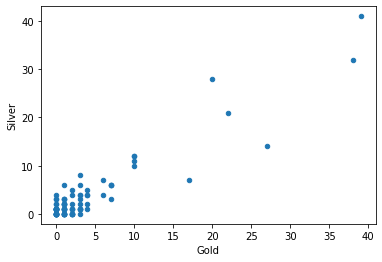

In [40]:
medal_count.plot.scatter(x="Gold", y="Silver")

<AxesSubplot:xlabel='Gold', ylabel='Silver'>

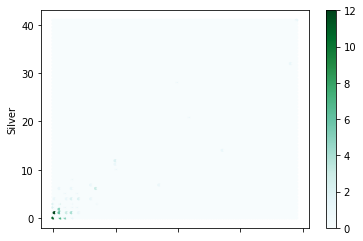

In [41]:
medal_count.plot.hexbin(x="Gold", y="Silver")

In [43]:
import seaborn as sns

<AxesSubplot:xlabel='Gold', ylabel='Silver'>

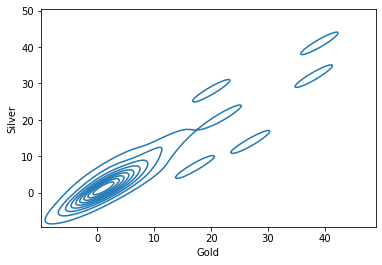

In [45]:
sns.kdeplot(x=medal_count["Gold"], y=medal_count["Silver"])

<AxesSubplot:>

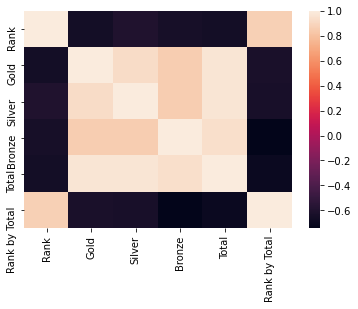

In [46]:
sns.heatmap(medal_count.corr())

In [48]:
medal_count.pivot_table(index="Team/NOC", columns="Gold", aggfunc='lambda', x: len(x), margins=True)

SyntaxError: invalid syntax (<ipython-input-48-920d11c09589>, line 1)

In [49]:
crosstab = medal_count.pivot_table(index='Team/NOC', columns='Gold',
aggfunc=lambda x: len(x), margins=True)

In [50]:
crosstab

Bronze                                             \
Gold                          0     1     2     3    4    6    7   10   17   
Team/NOC                                                                     
Argentina                   1.0   NaN   NaN   NaN  NaN  NaN  NaN  NaN  NaN   
Armenia                     1.0   NaN   NaN   NaN  NaN  NaN  NaN  NaN  NaN   
Australia                   NaN   NaN   NaN   NaN  NaN  NaN  NaN  NaN  1.0   
Austria                     NaN   1.0   NaN   NaN  NaN  NaN  NaN  NaN  NaN   
Azerbaijan                  1.0   NaN   NaN   NaN  NaN  NaN  NaN  NaN  NaN   
...                         ...   ...   ...   ...  ...  ...  ...  ...  ...   
Ukraine                     NaN   1.0   NaN   NaN  NaN  NaN  NaN  NaN  NaN   
United States of America    NaN   NaN   NaN   NaN  NaN  NaN  NaN  NaN  NaN   
Uzbekistan                  NaN   NaN   NaN   1.0  NaN  NaN  NaN  NaN  NaN   
Venezuela                   NaN   1.0   NaN   NaN  NaN  NaN  NaN  NaN  NaN   
All                        28.0  22.0  11.0  11.0  5.0  2.0  4.0  4.0  1.0   

                               ... Total                                     \
Gold                       20  ...     6    7   10   17   20   22   27   38   
Team/NOC                       ...                                            
Argentina                 NaN  ...   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
Armenia                   NaN  ...   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
Australia                 NaN  ...   NaN  NaN  NaN  1.0  NaN  NaN  NaN  NaN   
Austria                   NaN  ...   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
Azerbaijan                NaN  ...   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
...                       ...  ...   ...  ...  ...  ...  ...  ...  ...  ...   
Ukraine                   NaN  ...   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
United States of America  NaN  ...   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
Uzbekistan                NaN  ...   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
Venezuela                 NaN  ...   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
All                       1.0  ...   2.0  4.0  4.0  1.0  1.0  1.0  1.0  1.0   

                                   
Gold                       39 All  
Team/NOC                           
Argentina                 NaN   1  
Armenia                   NaN   1  
Australia                 NaN   1  
Austria                   NaN   1  
Azerbaijan                NaN   1  
...                       ...  ..  
Ukraine                   NaN   1  
United States of America  1.0   1  
Uzbekistan                NaN   1  
Venezuela                 NaN   1  
All                       1.0  93  

[94 rows x 75 columns]

<AxesSubplot:xlabel='Gold'>

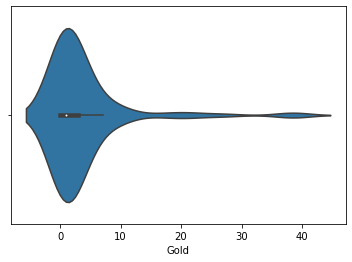

In [51]:
sns.violinplot(x=medal_count["Gold"])